# 1. Use yfinance to Extract Stock Data

In [2]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical stock data
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# 2. Use Webscraping to Extract Tesla Revenue Data

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with Tesla Revenue
table = soup.find('table')

# Extract data from the table
data = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append([date, revenue])

# Create a DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Display the last five rows
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


# 3. Use yfinance to Extract Stock Data

In [4]:
import yfinance as yf

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical stock data
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

# Save the DataFrame to a file if needed
gme_data.to_csv('gme_stock_data.csv', index=False)

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# 4. Use Webscraping to Extract GME Revenue Data

In [9]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response into a variable named html_data
    html_data = response.text
else:
    pass

from bs4 import BeautifulSoup

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

import pandas as pd

# Find the table in the HTML using BeautifulSoup
table = soup.find('table')

# Use pandas read_html to extract the table into a DataFrame
gme_revenue = pd.read_html(str(table))[0]


print(gme_revenue.tail())

    GameStop Annual Revenue (Millions of US $)  \
11                                        2009   
12                                        2008   
13                                        2007   
14                                        2006   
15                                        2005   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,806  
12                                       $7,094  
13                                       $5,319  
14                                       $3,092  
15                                       $1,843  


In [10]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [22]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.1
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'mamba' is not recognized as an internal or external command,
operable program or batch file.
ERROR: Could not find a version that satisfies the requirement nbformat==4.2.1 (from versions: 4.0.0, 4.0.1, 4.1.0, 4.2.0, 4.3.0, 4.4.0, 5.0.2, 5.0.3, 5.0.4, 5.0.5, 5.0.6, 5.0.7, 5.0.8, 5.0.9b0, 5.0.9b1, 5.1.0, 5.1.1, 5.1.2, 5.1.3, 5.2.0, 5.3.0b0, 5.3.0, 5.4.0, 5.5.0b1, 5.5.0, 5.6.0, 5.6.1, 5.7.0, 5.7.1, 5.7.2, 5.7.3, 5.8.0, 5.9.0, 5.9.1, 5.9.2)
ERROR: No matching distribution found for nbformat==4.2.1

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 5: Plot Tesla Stock Graph

In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

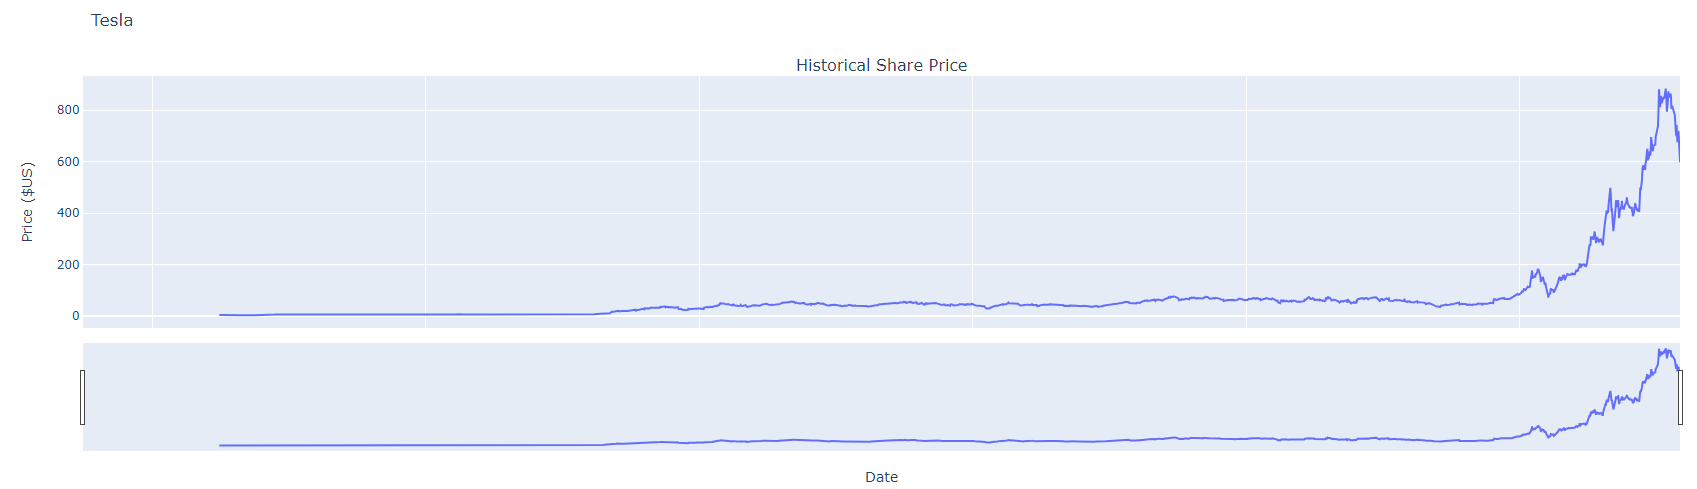

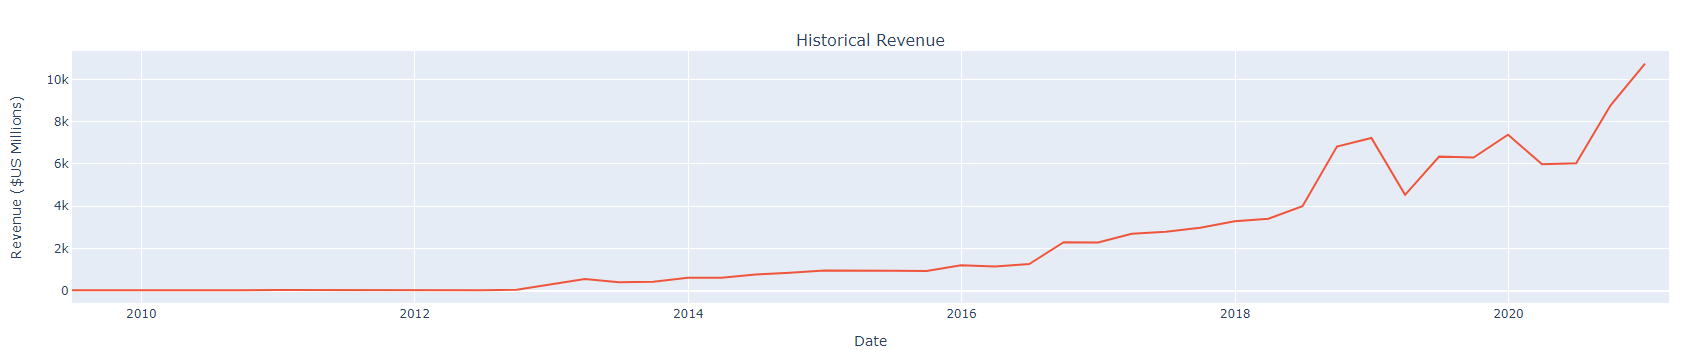

# 6. Plot GameStop Stock Graph

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop')

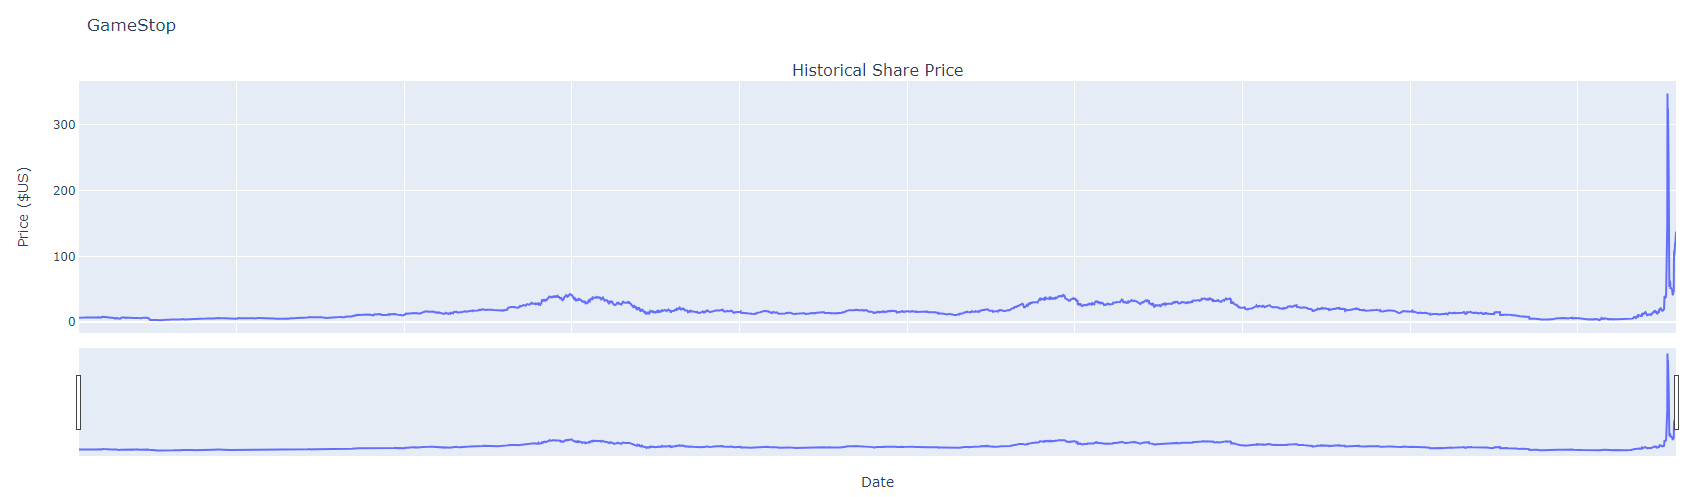

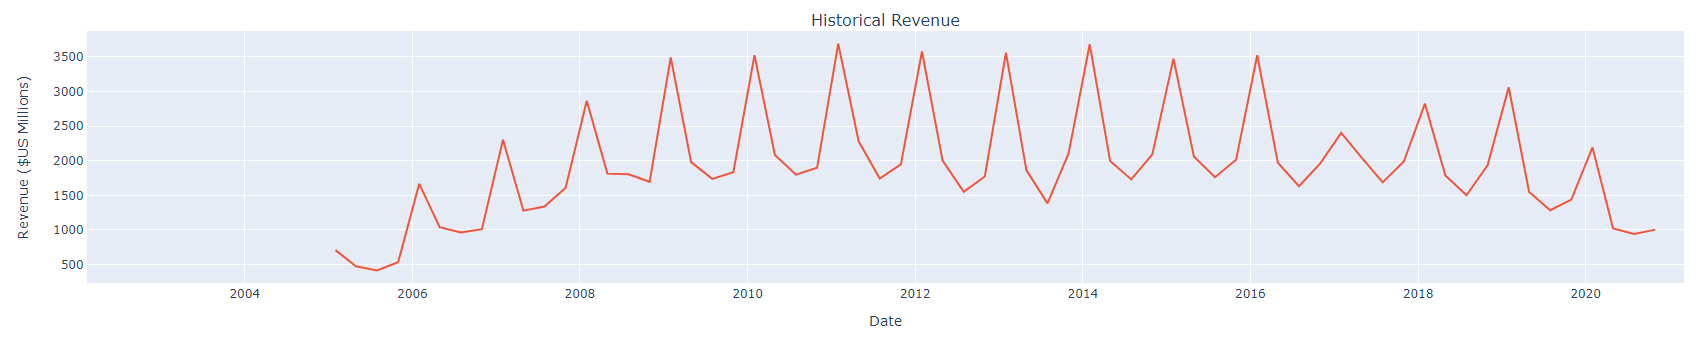